# Es_61_1


Lo scopo dell'esercitazione numero 6 è quello di implementare un codice simulante il modello di Ising 1D. Sono stati introdotti due diversi algoritmi di campionamento quello di Metropolis e quello di Gibbs. <br>
Sono state inltre aggiunte altre variabili: capacità termica, magnetizzazione e suscettibilità magnetica. Nei grafici sottostanti sono riportate le già citate grandezze, ottenunte con entrambi gli algoritmi Metropolis e Gibbs.<br>
È possibile osservare che i valori ottenuti con i due metodi sono compatibili fra di loro e i risultati di entrambi gli algoritmi mostrano le stesse tendenze con le soluzioni analitiche.<br>
La simulazione utilizza $\mu_b=1$ e $k_b=1$.<br>
Il sistema consiste in $N=50$ spin con $J=1$. Ogni funzione ($U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$) è calcolata per $T\in[0.5,2]$ e ha una stima dell'errore attraverso il data blocking.<br>
Non sono state utilizzate temperature inferiori a 0,5 perché per i due algoritmi adottati non sarebbe stato possibile esplorare efficacemente lo spazio dei parametri a temperature molto basse, a causa di un'alta probabilità di rigetto.

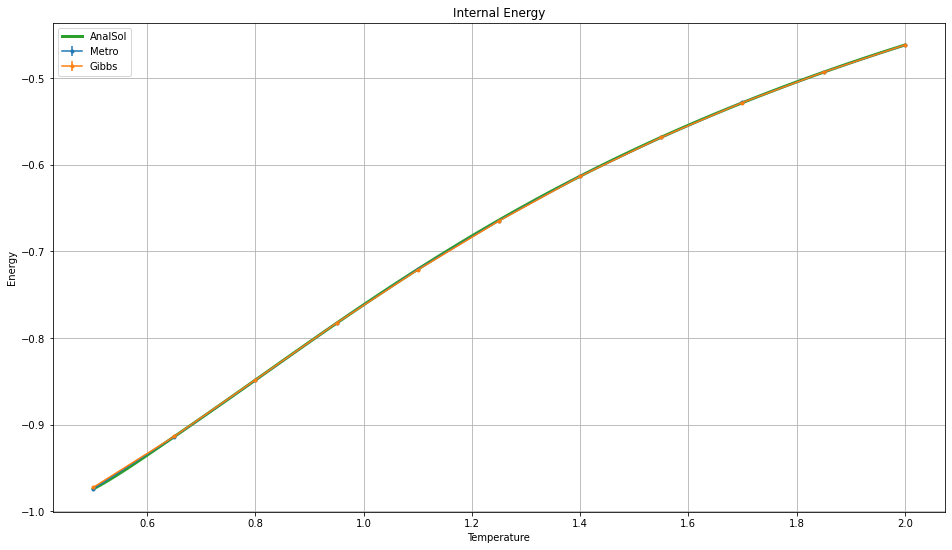

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,9]
x, y, err = np.loadtxt("output.ene_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metro")
x1, y1, err1 = np.loadtxt("output.ene_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label="AnalSol", linewidth = 3)
plt.title("Internal Energy")
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.legend(loc="best")
plt.grid(1)
plt.show()

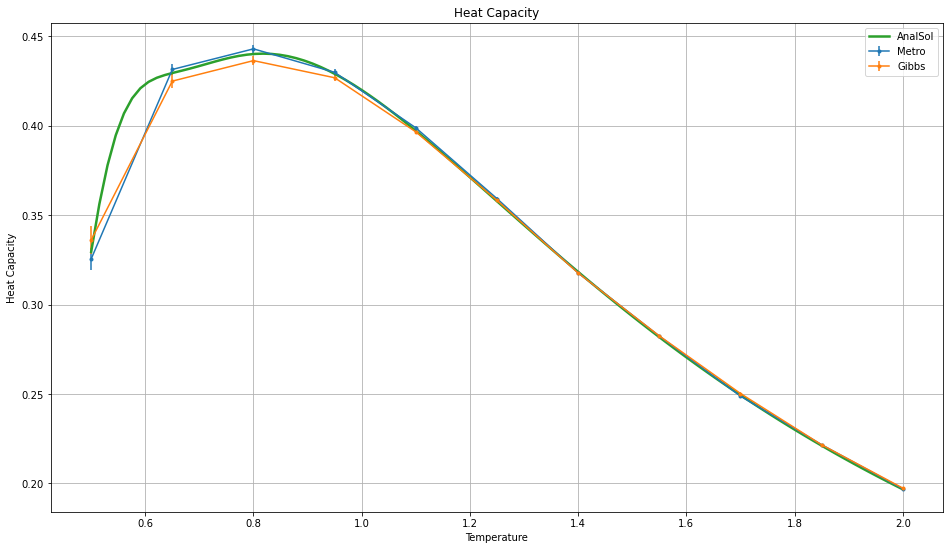

In [2]:
x, y, err = np.loadtxt("output.heat_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metro")
x1, y1, err1 = np.loadtxt("output.heat_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label="AnalSol", linewidth = 2.5)
plt.title("Heat Capacity")
plt.xlabel('Temperature')
plt.ylabel('Heat Capacity')
plt.legend(loc="best")
plt.grid(1)
plt.show()

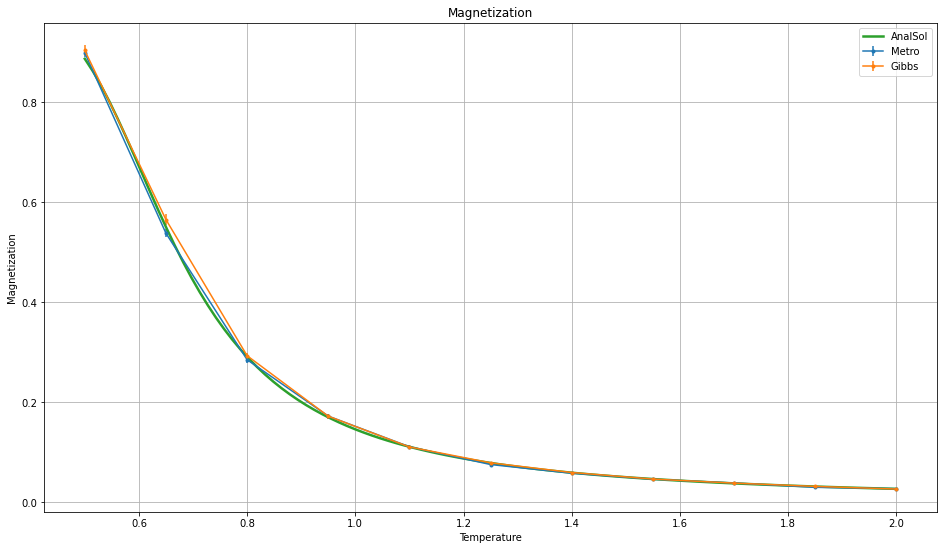

In [3]:
x, y, err = np.loadtxt("output.mag_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metro")
x1, y1, err1 = np.loadtxt("output.mag_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M, label="AnalSol", linewidth=2.5)
plt.title("Magnetization")
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.legend(loc="best")
plt.grid(1)
plt.show()

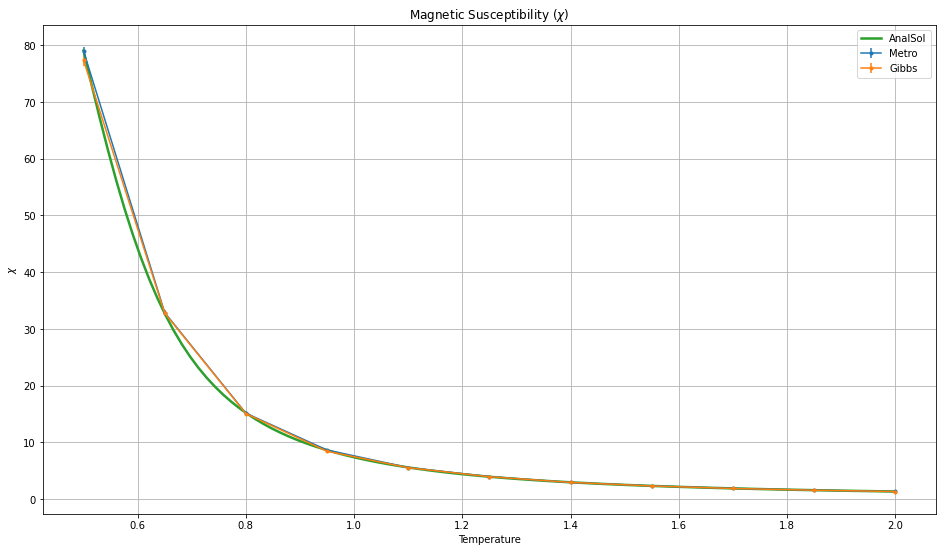

In [5]:
x, y, err = np.loadtxt("output.x_m.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x,y, yerr=err, marker=".", label="Metro")
x1, y1, err1 = np.loadtxt("output.x_g.t", usecols=(0,1,2), unpack="true", delimiter=";")
plt.errorbar(x1,y1, yerr=err1, marker=".", label="Gibbs")
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label="AnalSol", linewidth=2.5)
plt.title("Magnetic Susceptibility ($\chi$)")
plt.xlabel('Temperature')
plt.ylabel('$\chi$')
plt.legend(loc="best")
plt.grid(1)
plt.show()